In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression as SklearnLogisticRegression
from sklearn.metrics import (
    confusion_matrix, 
    classification_report, 
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve
)

from LogisticRegression import LogisticRegression

# Set random seed untuk reproducibility
np.random.seed(42)

from IPython.display import Image, display


In [2]:
df = pd.read_csv('titanic_clean.csv')

print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())

print("\nDataset Info:")
print(df.info())

print("\nMissing Values:")
print(df.isnull().sum())

print("\nSurvival Rate:")
print(df['survived'].value_counts(normalize=True))


Dataset Shape: (1310, 16)

First 5 rows:
   Unnamed: 0  pclass  survived  \
0           1     1.0       1.0   
1           2     1.0       1.0   
2           3     1.0       0.0   
3           4     1.0       0.0   
4           5     1.0       0.0   

                                              name     sex      age  sibsp  \
0                    Allen, Miss. Elisabeth Walton  female  29.0000    0.0   
1                   Allison, Master. Hudson Trevor    male   0.9167    1.0   
2                     Allison, Miss. Helen Loraine  female   2.0000    1.0   
3             Allison, Mr. Hudson Joshua Creighton    male  30.0000    1.0   
4  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female  25.0000    1.0   

   parch  ticket      fare    cabin embarked boat   body  \
0    0.0   24160  211.3375       B5        S    2    NaN   
1    2.0  113781  151.5500  C22 C26        S   11    NaN   
2    2.0  113781  151.5500  C22 C26        S  NaN    NaN   
3    2.0  113781  151.5500  C22 C26    

In [3]:
features = ['pclass', 'age', 'sibsp', 'parch', 'fare', 'has_cabin_number']

# Tambahkan encoding untuk sex
df['sex_encoded'] = df['sex'].map({'male': 0, 'female': 1})
features.append('sex_encoded')

print(f"\nMissing values before:")
print(df[features].isnull().sum())

# drop rows dengan missing values
df_clean = df.dropna(subset=features + ['survived'])

print(f"\nMissing values after:")
print(df_clean[features].isnull().sum())

# prepare X dan y
X = df_clean[features].values
y = df_clean['survived'].values

print(f"\nX shape: {X.shape}")
print(f"y shape: {y.shape}")
print(f"\nClass distribution:")
print(f"Survived: {np.sum(y == 1)} ({np.mean(y == 1)*100:.2f}%)")
print(f"Not Survived: {np.sum(y == 0)} ({np.mean(y == 0)*100:.2f}%)")



Missing values before:
pclass              1
age                 0
sibsp               1
parch               1
fare                2
has_cabin_number    0
sex_encoded         1
dtype: int64

Missing values after:
pclass              0
age                 0
sibsp               0
parch               0
fare                0
has_cabin_number    0
sex_encoded         0
dtype: int64

X shape: (1308, 7)
y shape: (1308,)

Class distribution:
Survived: 500 (38.23%)
Not Survived: 808 (61.77%)


In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")
print(f"\nTraining set class distribution:")
print(f"Survived: {np.sum(y_train == 1)} ({np.mean(y_train == 1)*100:.2f}%)")
print(f"Not Survived: {np.sum(y_train == 0)} ({np.mean(y_train == 0)*100:.2f}%)")

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Training set size: 1046
Testing set size: 262

Training set class distribution:
Survived: 400 (38.24%)
Not Survived: 646 (61.76%)


In [5]:
# pelatihan buatan sendiri

print("Training our logreg...")
custom_model = LogisticRegression(learning_rate=0.01, n_iterations=1000, threshold=0.5)
custom_model.fit(X_train_scaled, y_train, track_history=True)

# Prediksi
y_train_pred_custom = custom_model.predict(X_train_scaled)
y_test_pred_custom = custom_model.predict(X_test_scaled)
y_test_prob_custom = custom_model.predict_probability(X_test_scaled)

print("Custom model training complete!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")

Training our logreg...
Custom model training complete!!!!!!!!!!!!!!!!!!!!!!!!!!!!!


Computing loss landscape...
Generating GIF with 1000 frames...
GIF saved to training_vis.gif
Duration: 200.0 seconds
Shows hasil training: training_vis.gif


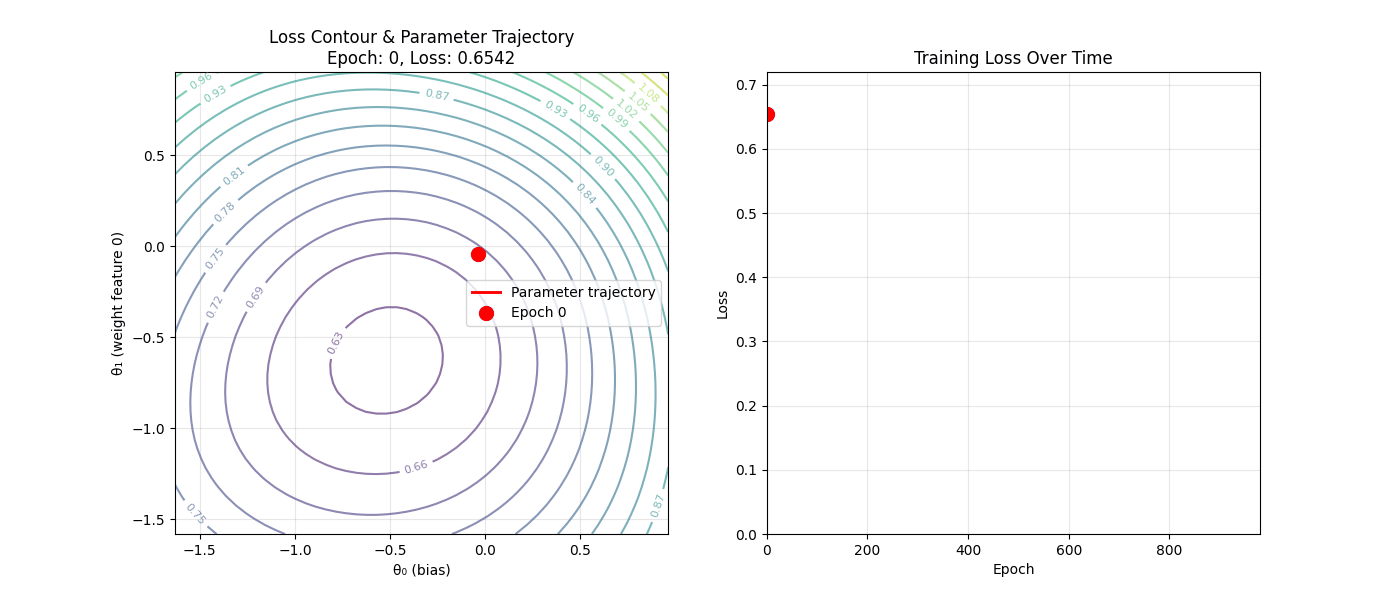

In [6]:
# visualisasi gif/video plot 

output_file = 'training_vis.gif'

custom_model.generate_training_gif(
    X=X_train_scaled, 
    y=y_train, 
    subsample_rate=20,
    output_path=output_file, 
    fps=5              
)

print(f"Shows hasil training: {output_file}")
from IPython.display import Image, display
display(Image(filename=output_file))

In [7]:
# pake scikit

print("Training Scikit logreg...")
sklearn_model = SklearnLogisticRegression(max_iter=1000, random_state=42)
sklearn_model.fit(X_train_scaled, y_train)

# Prediksi
y_train_pred_sklearn = sklearn_model.predict(X_train_scaled)
y_test_pred_sklearn = sklearn_model.predict(X_test_scaled)
y_test_prob_sklearn = sklearn_model.predict_proba(X_test_scaled)[:, 1]

print("Scikit logreg model training completed!")

Training Scikit logreg...
Scikit logreg model training completed!


In [10]:
def evaluate_model(y_true, y_pred, y_prob, model_name):
    print(f"\n{'='*50}")
    print(f"{model_name} Evaluation Results")
    print(f"{'='*50}")
    
    # Accuracy
    acc = accuracy_score(y_true, y_pred)
    print(f"\nAccuracy: {acc:.4f}")
    
    # Precision, Recall, F1-Score
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    roc_auc = roc_auc_score(y_true, y_prob)
    
    # Classification Report
    print(f"\nClassification Report:")
    print(classification_report(y_true, y_pred, target_names=['Not Survived', 'Survived']))
    
    return {
        'accuracy': acc,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'roc_auc': roc_auc
    }

# Evaluasi Custom Model
custom_metrics = evaluate_model(y_test, y_test_pred_custom, y_test_prob_custom, "Custom Logistic Regression")

# Evaluasi Scikit-learn Model
sklearn_metrics = evaluate_model(y_test, y_test_pred_sklearn, y_test_prob_sklearn, "Scikit-learn Logistic Regression")



Custom Logistic Regression Evaluation Results

Accuracy: 0.8053
Precision: 0.7426
Recall: 0.7500
F1-Score: 0.7463

Classification Report:
              precision    recall  f1-score   support

Not Survived       0.84      0.84      0.84       162
    Survived       0.74      0.75      0.75       100

    accuracy                           0.81       262
   macro avg       0.79      0.79      0.79       262
weighted avg       0.81      0.81      0.81       262


Scikit-learn Logistic Regression Evaluation Results

Accuracy: 0.8053
Precision: 0.7426
Recall: 0.7500
F1-Score: 0.7463

Classification Report:
              precision    recall  f1-score   support

Not Survived       0.84      0.84      0.84       162
    Survived       0.74      0.75      0.75       100

    accuracy                           0.81       262
   macro avg       0.79      0.79      0.79       262
weighted avg       0.81      0.81      0.81       262



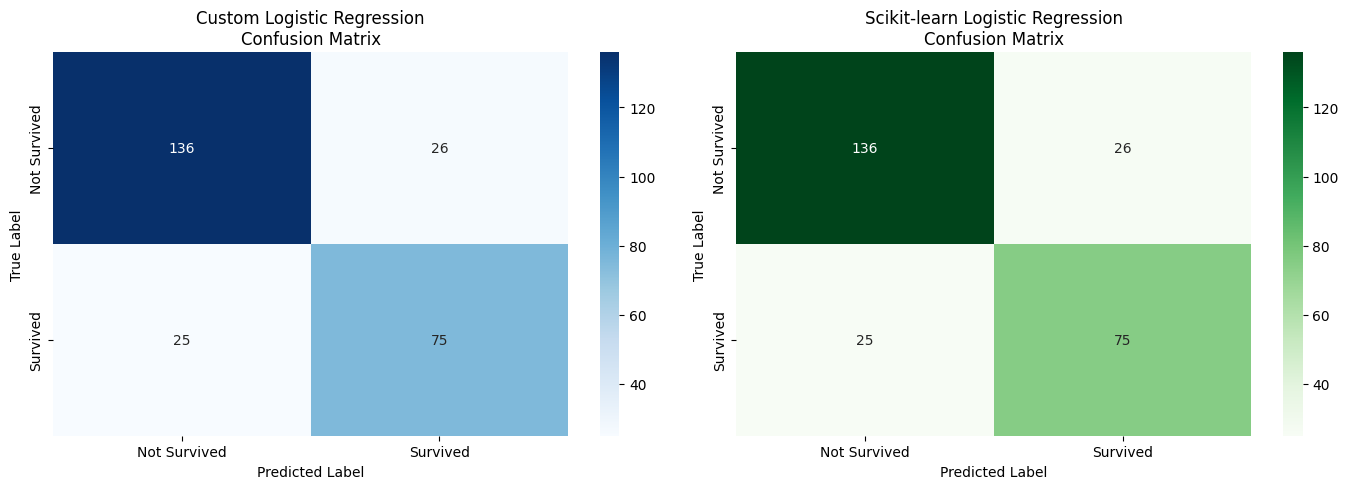

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Our Confusion Matrix
cm_custom = confusion_matrix(y_test, y_test_pred_custom)
sns.heatmap(cm_custom, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=['Not Survived', 'Survived'],
            yticklabels=['Not Survived', 'Survived'])
axes[0].set_title('Custom Logistic Regression\nConfusion Matrix')
axes[0].set_ylabel('True Label')
axes[0].set_xlabel('Predicted Label')

# Scikit Confusion Matrix
cm_sklearn = confusion_matrix(y_test, y_test_pred_sklearn)
sns.heatmap(cm_sklearn, annot=True, fmt='d', cmap='Greens', ax=axes[1],
            xticklabels=['Not Survived', 'Survived'],
            yticklabels=['Not Survived', 'Survived'])
axes[1].set_title('Scikit-learn Logistic Regression\nConfusion Matrix')
axes[1].set_ylabel('True Label')
axes[1].set_xlabel('Predicted Label')

plt.tight_layout()
plt.show()

In [17]:
print("\n" + "="*60)
print("TRAINING SET PERFORMANCE")
print("="*60)

# Custom Model on Training Set
acc_train_custom = accuracy_score(y_train, y_train_pred_custom)
print(f"\nOur Model Training Accuracy: {acc_train_custom:.4f}")

# Scikit-learn Model on Training Set
acc_train_sklearn = accuracy_score(y_train, y_train_pred_sklearn)
print(f"Scikit Model Training Accuracy: {acc_train_sklearn:.4f}")

print(f"\n{'='*60}")
print("OVERFITTING ANALYSIS")
print(f"{'='*60}")
print(f"Our Model:")
print(f"  Training Accuracy: {acc_train_custom:.4f}")
print(f"  Test Accuracy: {custom_metrics['accuracy']:.4f}")
print(f"  Difference: {(acc_train_custom - custom_metrics['accuracy']):.4f}")

print(f"\nScikit Model:")
print(f"  Training Accuracy: {acc_train_sklearn:.4f}")
print(f"  Test Accuracy: {sklearn_metrics['accuracy']:.4f}")


TRAINING SET PERFORMANCE

Our Model Training Accuracy: 0.7792
Scikit Model Training Accuracy: 0.7792

OVERFITTING ANALYSIS
Our Model:
  Training Accuracy: 0.7792
  Test Accuracy: 0.8053
  Difference: -0.0262

Scikit Model:
  Training Accuracy: 0.7792
  Test Accuracy: 0.8053
